In [1]:
import zipfile

## download file
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

## unzip file
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

--2024-06-17 13:24:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  83.5MB/s    in 6.3s    

2024-06-17 13:24:45 (79.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



## Working with Data to know it more

In [2]:
import os
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath} .")

there are 2 directories and 0 images in 10_food_classes_all_data .
there are 10 directories and 0 images in 10_food_classes_all_data/train .
there are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice .
there are 0 directories and 750 images in 10_food_classes_all_data/train/pizza .
there are 0 directories and 750 images in 10_food_classes_all_data/train/ramen .
there are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger .
there are 0 directories and 750 images in 10_food_classes_all_data/train/steak .
there are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings .
there are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream .
there are 0 directories and 750 images in 10_food_classes_all_data/train/sushi .
there are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry .
there are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon .
there are 1

In [3]:
test_dir = '/content/10_food_classes_all_data/test/'
train_dir = '/content/10_food_classes_all_data/train/'

In [4]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [5]:
import random
random.choice(class_names)

'chicken_curry'

Image shape: (512, 306, 3)


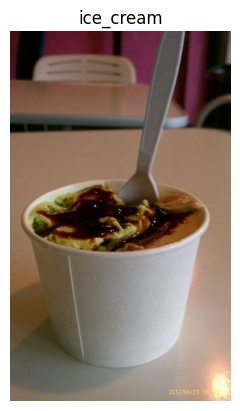

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img
img = view_random_image(target_dir = train_dir , target_class=random.choice(class_names))


#**Preprocessing**

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

## Load data and turn it into batches

train_set = train_datagen.flow_from_directory(
    train_dir,target_size=(224,224),
    class_mode = 'categorical', ## not binary because the project is multi class.
    batch_size = 32 ## default
)

test_set = test_datagen.flow_from_directory(
    test_dir,target_size=(224,224),
    class_mode = 'categorical', ## not binary because the project is multi class.
    batch_size = 32 ## default
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#**Model**
* we're gonna use CNN explainer

In [8]:
## cnn explainer : https://poloclub.github.io/cnn-explainer/
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation

model = Sequential([
    Conv2D(filters=10,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
    Conv2D(filters=10,kernel_size=(3,3)),
    Activation(activation='relu'), ## we could define it previous line in Conv2D
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(10,activation = 'softmax')
])

In [9]:
model.compile(
    loss='categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 activation (Activation)     (None, 220, 220, 10)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

In [10]:
## Fitting model
history = model.fit(
    train_set,
    epochs = 5,
    steps_per_epoch = len(train_set),
    validation_data = test_set,
    validation_steps = len(test_set)
)

Epoch 1/5
235/235 [==============================] - 42s 151ms/step - loss: 2.1817 - accuracy: 0.1916 - val_loss: 2.0657 - val_accuracy: 0.2420
Epoch 2/5
235/235 [==============================] - 29s 125ms/step - loss: 1.8766 - accuracy: 0.3452 - val_loss: 1.8765 - val_accuracy: 0.3424
Epoch 3/5
235/235 [==============================] - 30s 129ms/step - loss: 1.4515 - accuracy: 0.5104 - val_loss: 2.0397 - val_accuracy: 0.3292
Epoch 4/5
235/235 [==============================] - 30s 128ms/step - loss: 0.8746 - accuracy: 0.7137 - val_loss: 2.4919 - val_accuracy: 0.2980
Epoch 5/5
235/235 [==============================] - 29s 125ms/step - loss: 0.3634 - accuracy: 0.8852 - val_loss: 3.7567 - val_accuracy: 0.2764


In [12]:
model.evaluate(test_set)

79/79 [==============================] - 7s 83ms/step - loss: 3.7567 - accuracy: 0.2764


[3.7566921710968018, 0.27639999985694885]

## Note :
* as we can observe the training set accuracy is too high but validation accuracy is awful => **Overfitting**

In [11]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

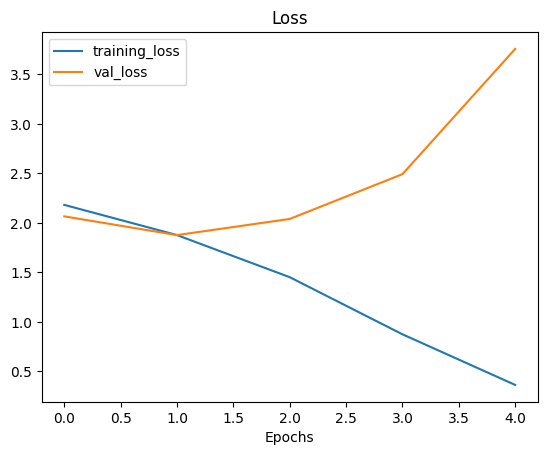

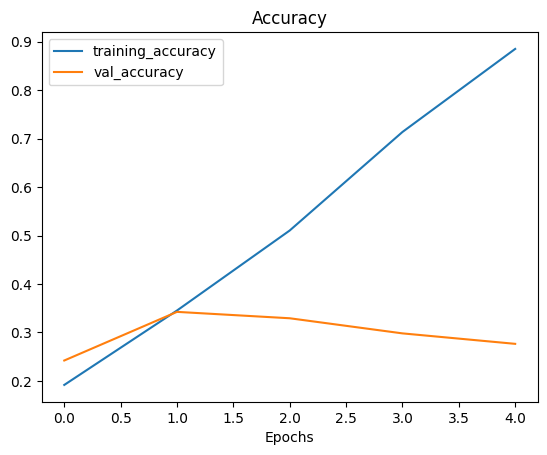

In [13]:
plot_loss_curves(history)

#**Note :**
### so we have to overcome overfitting problem

* Get more data
* Simplify model
* Data Augmentation
* Transfer Learning

In [14]:
## simplify model by removing some conv layers
model2 = Sequential([
    Conv2D(filters=10,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
    Activation(activation='relu'), ## we could define it previous line in Conv2D
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(10,3,activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(10,activation = 'softmax')
])

In [15]:
model2.compile(
    loss='categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 29160)            

In [16]:
## Fitting model
history = model2.fit(
    train_set,
    epochs = 5,
    steps_per_epoch = len(train_set),
    validation_data = test_set,
    validation_steps = len(test_set)
)

Epoch 1/5
235/235 [==============================] - 33s 128ms/step - loss: 2.1034 - accuracy: 0.2556 - val_loss: 1.9213 - val_accuracy: 0.3256
Epoch 2/5
235/235 [==============================] - 29s 123ms/step - loss: 1.8108 - accuracy: 0.3743 - val_loss: 1.8488 - val_accuracy: 0.3560
Epoch 3/5
235/235 [==============================] - 29s 124ms/step - loss: 1.5241 - accuracy: 0.4901 - val_loss: 1.9031 - val_accuracy: 0.3420
Epoch 4/5
235/235 [==============================] - 33s 142ms/step - loss: 1.1295 - accuracy: 0.6409 - val_loss: 2.1481 - val_accuracy: 0.3252
Epoch 5/5
235/235 [==============================] - 40s 167ms/step - loss: 0.7027 - accuracy: 0.7891 - val_loss: 2.4884 - val_accuracy: 0.2944


In [17]:
model2.evaluate(test_set)

79/79 [==============================] - 7s 84ms/step - loss: 2.4884 - accuracy: 0.2944


[2.488400459289551, 0.29440000653266907]

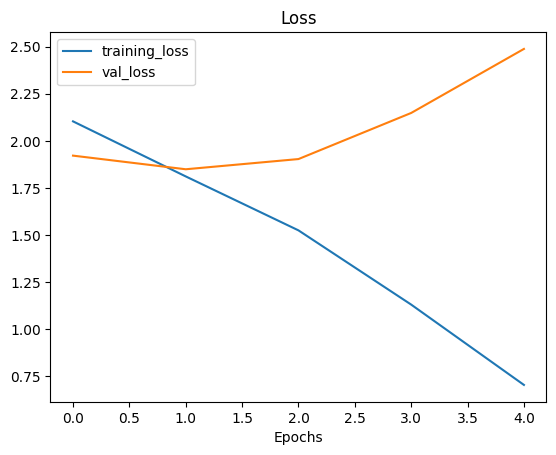

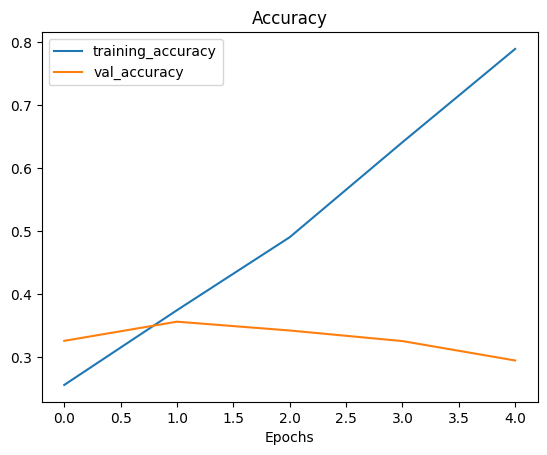

In [18]:
plot_loss_curves(history)

## Note:
* as we can observe the number of trainable params is increased with simplifying model and accuracy is decreased and overfitting still remains.